                                                  Task 
Create a decision tree that can predict the survival of passengers on the Titanic with no restrictions on the depth of the tree
Use the titanic.csv dataset and the the file name decision_tree_titanic.ipynb
Select relevant variables from the data and split the data into a training development, and a test set
Train a decision tree and make a plodt of it
Compute the model's accuracy on the evelopment set
Try building model with different values of the max_depth [2-10]. At each step, create a plot of the tree and store the accuracies on both the training and development data.
Ploty a line of the training accuracies and another of the development accuracies in the same graph. Write down what shape the lines have and what this shape mean
Report the accuracy of the final model on the test data.

In [109]:
# Import the required libraries. More libraries updated as required later. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Task 1 - Import the Titanic dataset into the frame. For this task, we use the titanic.csv file, and assign it titanic_df

In [110]:
# Import the data
titanic_df = pd.read_csv("titanic.csv")

Task 2 - Inspect the dataset. Before building the decision tree, we investigate and prepare the dataset

In [111]:
# to find out how much content is in the dataset
titanic_df.shape

(891, 12)

In [112]:
# To understand the structure and characteristics of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
# Checking the top 5 of the dataset
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
# Checking the last 5 entries of the dataset
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [115]:
# Display the columns
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
# Assign titanic_df to x and conduct a final inspection

X = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Print the first few rows to inspect the data
print(X.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S


Task - Decison tree creation. We firstly, want to identify the variables in the decision tree, checking for any missing values, and convert the categorical variables using one hot encoding. 

In [117]:
# Identify dependent variable (target)
y = titanic_df['Survived']

# Identify independent variables (features)
X = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]


In [118]:
# Identify missing values in the DataFrame
missing_values = X.isnull().sum()

# Print the number of missing values in each column
print("Missing values:")
print(missing_values[missing_values > 0])

Missing values:
Age         177
Embarked      2
dtype: int64



The output you provided indicates the number of missing values in two columns, "Age" and "Embarked," in your dataset. 
There are 177 missing values in the "Age" column.
This means that for 177 rows in your dataset, the "Age" information is not available.
Embarked Column:

There are 2 missing values in the "Embarked" column.
This suggests that for 2 rows in your dataset, the information about the port of embarkation is not available.

In [119]:
# identify the contents in Sex
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [120]:
# Display unique values in the 'Embarked' column
unique_embarked_values = titanic_df['Embarked'].unique()
print(unique_embarked_values)

['S' 'C' 'Q' nan]


In [121]:
# Convert the categorical variables ('Sex' and 'Embarked') to numerical using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)


In [122]:
# Select the updated features
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]


In [123]:
# Select the updated features
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]

# Print the first few rows to insect the updated features
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


Task - Training the dataset. 

Select relevant variables from the data and split the data into a training development, and a test set
Train a decision tree and make a plot of it
Compute the model's accuracy on the development set
Try building model with different values of the max_depth [2-10]. At each step, create a plot of the tree and store the accuracies on both the training and development data.
Ploty a line of the training accuracies and another of the development accuracies in the same graph. Write down what shape the lines have and what this shape means
Report the accuracy of the final model on the test data.

In [125]:
# Split the data into training, development, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [126]:
# Identify missing values
missing_values_train = X_train.isnull().sum()
missing_values_dev = X_dev.isnull().sum()

# Print the number of missing values in each column for training and development sets
print("Missing values in X_train:")
print(missing_values_train[missing_values_train > 0])

print("\nMissing values in X_dev:")
print(missing_values_dev[missing_values_dev > 0])


Missing values in X_train:
Age    124
dtype: int64

Missing values in X_dev:
Age    30
dtype: int64


The output indicates the number of missing values in the "Age" column for the two different subsets of the dataset:

X_train: There are 124 missing values in the "Age" column for the training set (X_train).
This means that, in the training set, there are 124 rows where the "Age" information is not available.

X_dev: There are 30 missing values in the "Age" column for the development set (X_dev).
This indicates that, in the development set, there are 30 rows where the "Age" information is not available.

We need to handle the missing values before training the module. there are two techniques Imputation _ ie replacing the missing values with a statistical measure or removing the affected rows/columns. For this task, we drop the affected category (Age)

In [127]:
# Drop samples with missing values
X_train = X_train.dropna(subset=['Age'])
y_train = y_train.loc[X_train.index]

X_dev = X_dev.dropna(subset=['Age'])
y_dev = y_dev.loc[X_dev.index]

After dropping the dataset, we will proceed to create the decision tree

In [128]:
# Train a decision tree with different max_depth values
max_depth_values = range(2, 11)
train_accuracies = []
dev_accuracies = []

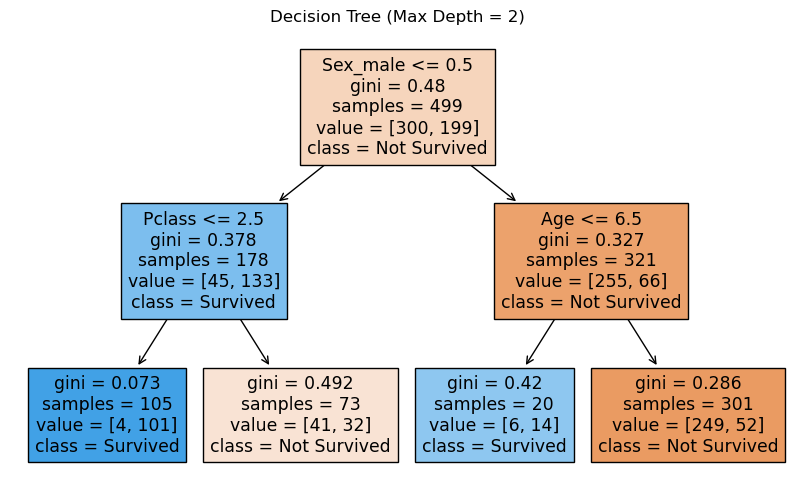

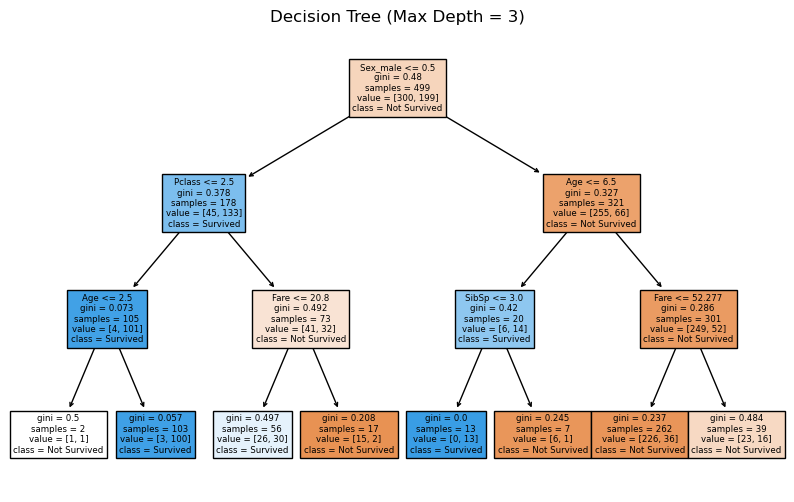

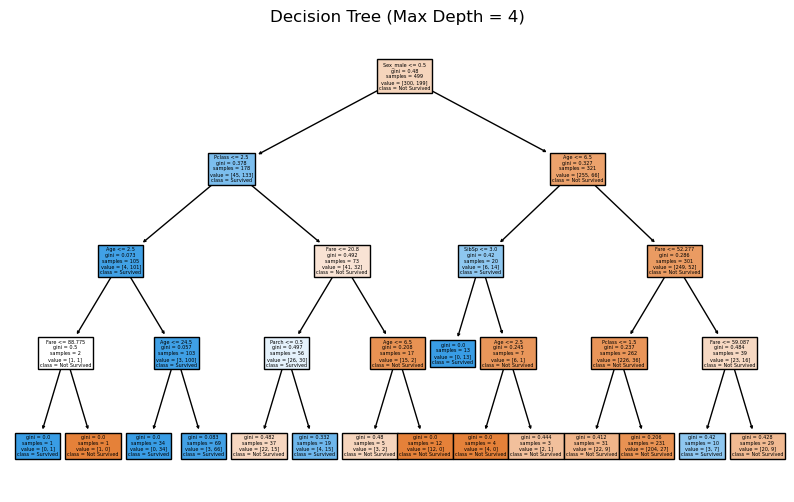

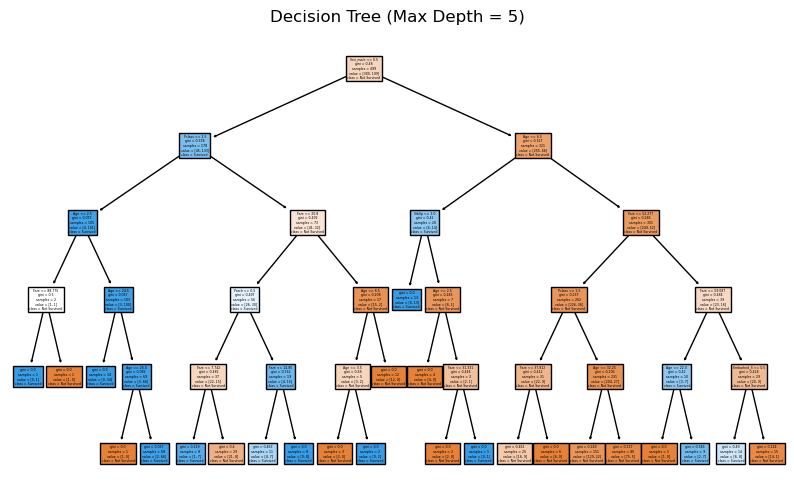

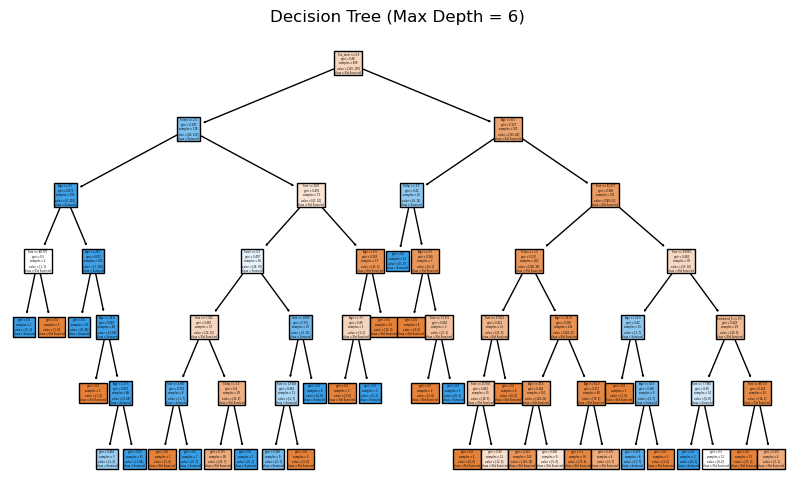

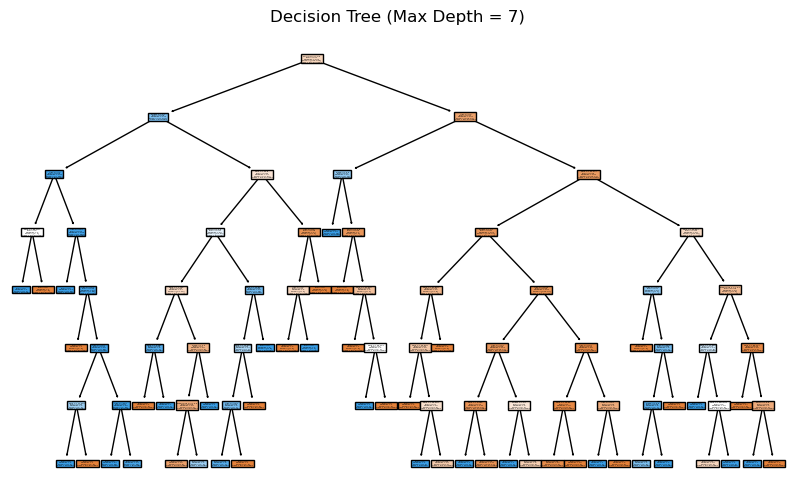

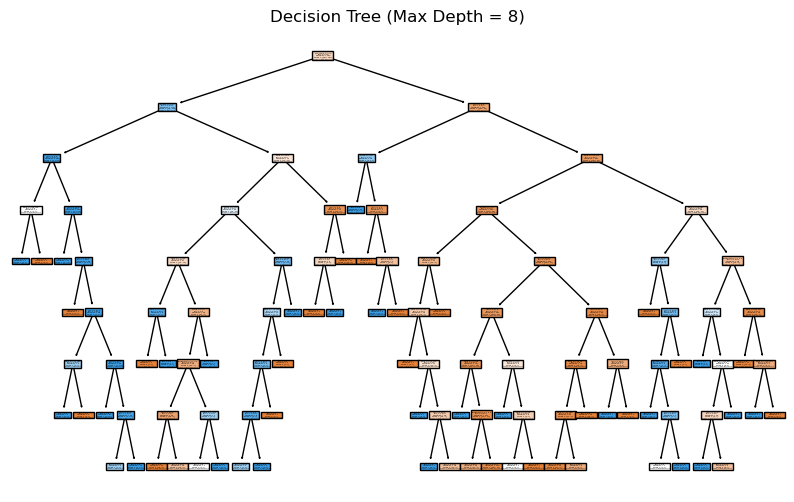

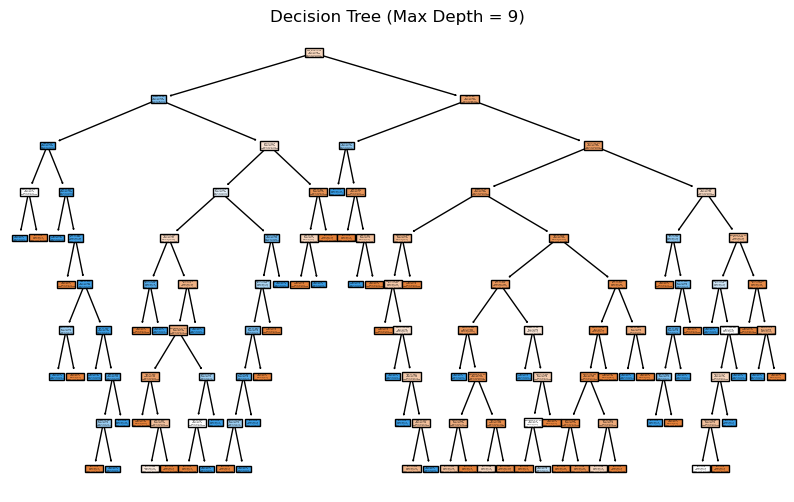

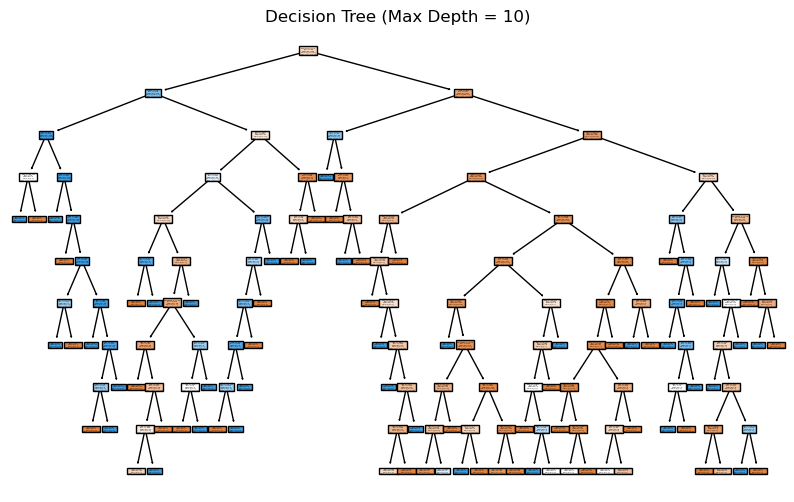

In [130]:
# Initialise empty lists to store accuracies for each depth
train_accuracies = []
dev_accuracies = []

for depth in max_depth_values:
    # Create and fit the decision tree
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Make predictions on training and development sets
    y_train_pred = dt_classifier.predict(X_train)
    y_dev_pred = dt_classifier.predict(X_dev)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    dev_acc = accuracy_score(y_dev, y_dev_pred)

    # Store accuracies
    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)

    # Plot the decision tree
    plt.figure(figsize=(10, 6))
    plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
    plt.title(f'Decision Tree (Max Depth = {depth})')
    plt.show()


In [131]:
# Find the index of the maximum development accuracy
best_dev_accuracy_index = np.argmax(dev_accuracies)

# Get the corresponding best max depth
best_max_depth = max_depth_values[best_dev_accuracy_index]

# Use the best_max_depth to train the final decision tree
final_dt_classifier = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_dt_classifier.fit(X_train, y_train)

# Make predictions on the development set
y_dev_pred = final_dt_classifier.predict(X_dev)

# Calculate accuracy on the development set
dev_accuracy = accuracy_score(y_dev, y_dev_pred)

print(f"Best Max Depth: {best_max_depth}")
print(f"Accuracy on the development set: {dev_accuracy:.4f}")

Best Max Depth: 3
Accuracy on the development set: 0.8365


Alternatively, we can run the code below:
This generates a single plot that compares training and development accuracies across different maximum depths without visualising individual decision trees.
Alternatively, the decision tree is not plotted within the loop, and a single plot is created after iterating over all maximum depths, and a single plot is created after iterating over all maximum depths
The first code generates multiple plots for individual decision trees, while the second code creates a single plot comparing training and development accuracies across different maximum depths

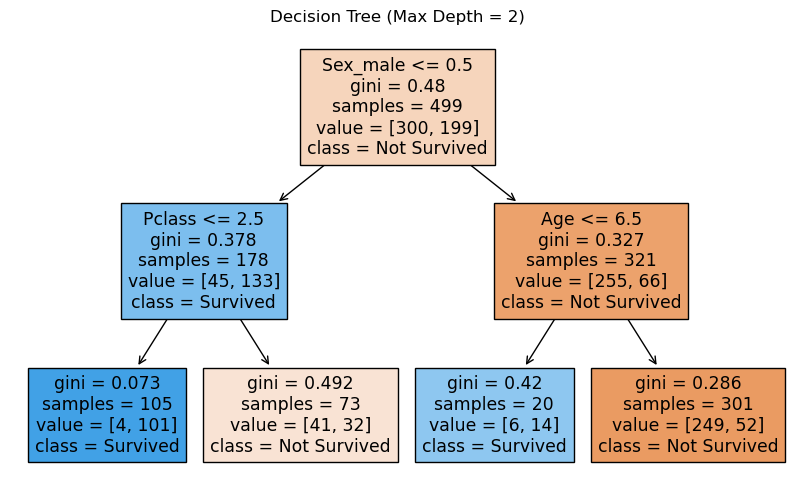

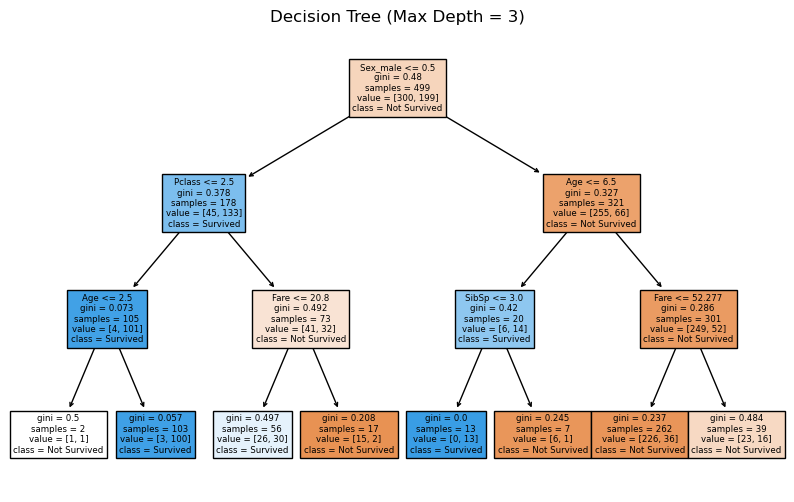

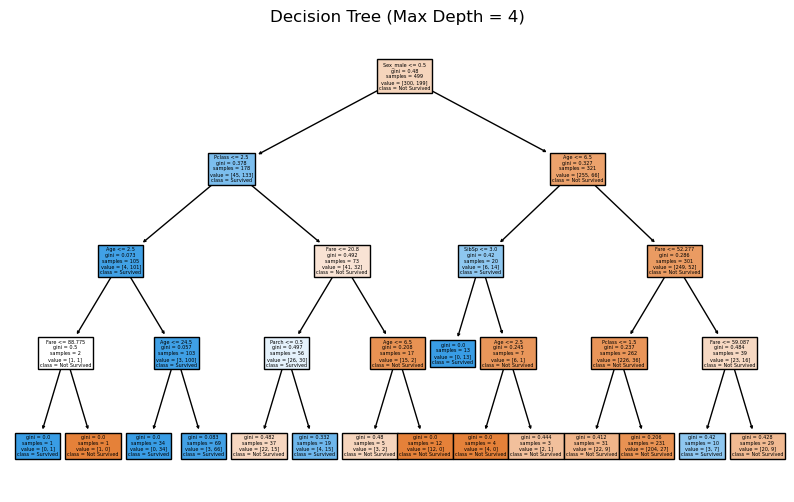

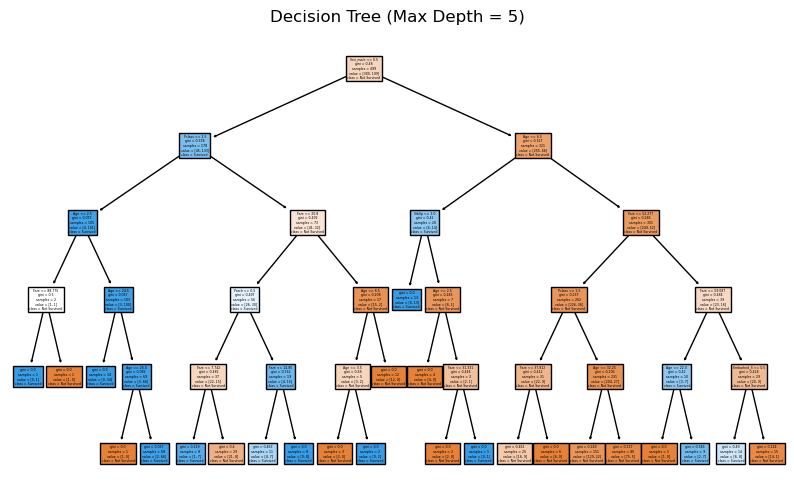

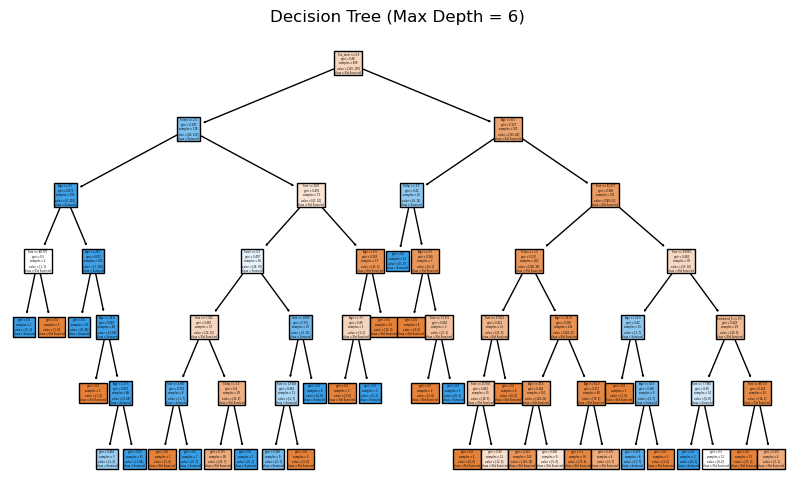

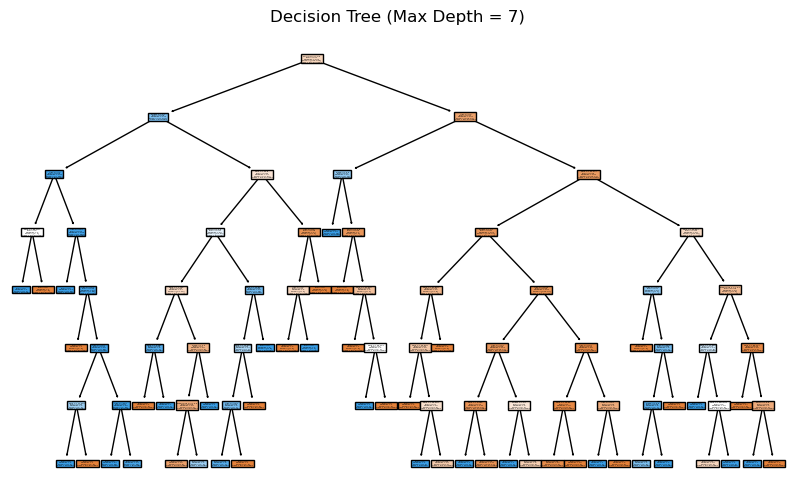

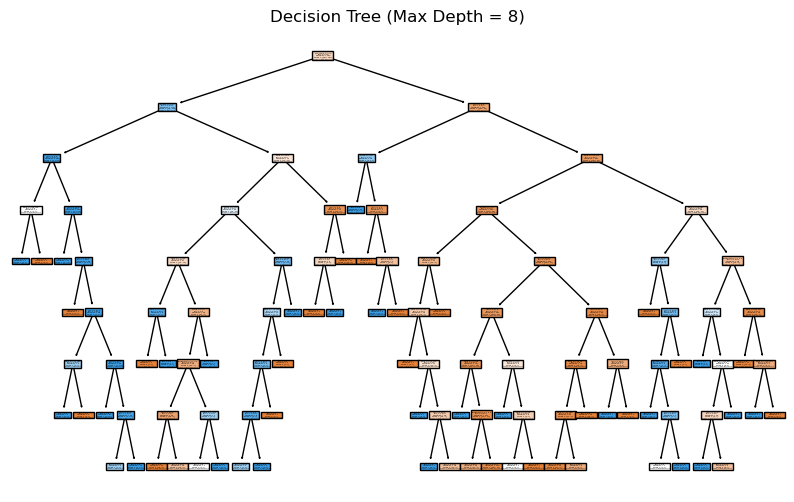

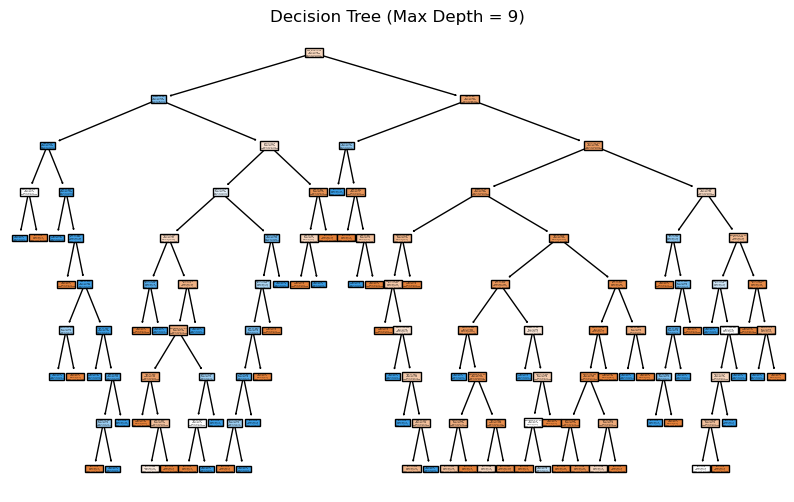

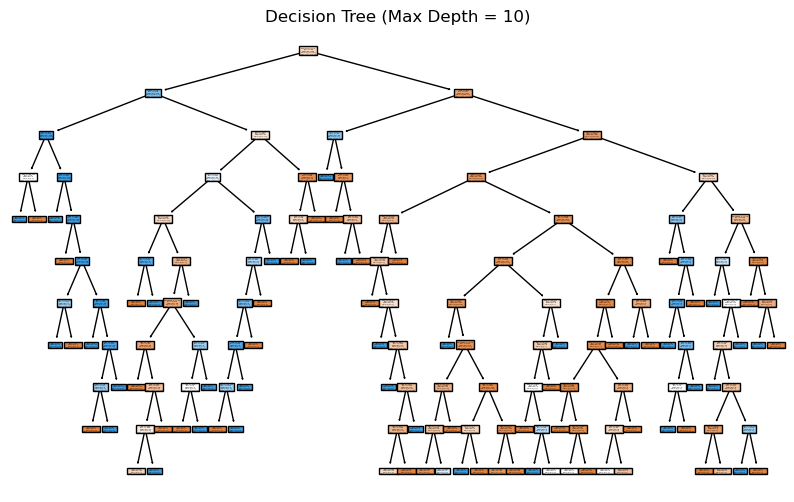

Text(0.5, 0, 'Max Depth')

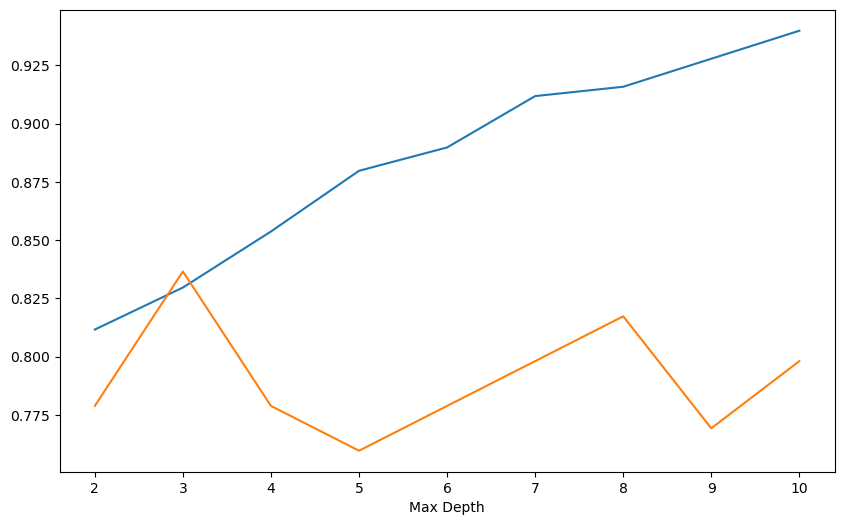

In [132]:
# Set random seed for reproducibility
np.random.seed(42)

# Values of max_depth to try
max_depth_values = list(range(2, 11))

# Lists to store accuracies
train_accuracies = []
dev_accuracies = []

# Iterate over different max_depth values
for depth in max_depth_values:
    # Create and fit the decision tree
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Make predictions on training and development sets
    y_train_pred = dt_classifier.predict(X_train)
    y_dev_pred = dt_classifier.predict(X_dev)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    dev_acc = accuracy_score(y_dev, y_dev_pred)

    # Store accuracies
    train_accuracies.append(train_acc)
    dev_accuracies.append(dev_acc)

    # Plot the decision tree
    plt.figure(figsize=(10, 6))
    plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
    plt.title(f'Decision Tree (Max Depth = {depth})')
    plt.show()

# Plot the training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, dev_accuracies, label='Development Accuracy')
plt.xlabel('Max Depth')

Task - Plotting a line of the training accuracies and the development accurencies in the same graphs. Here, we plot three different graphs for visualisation.

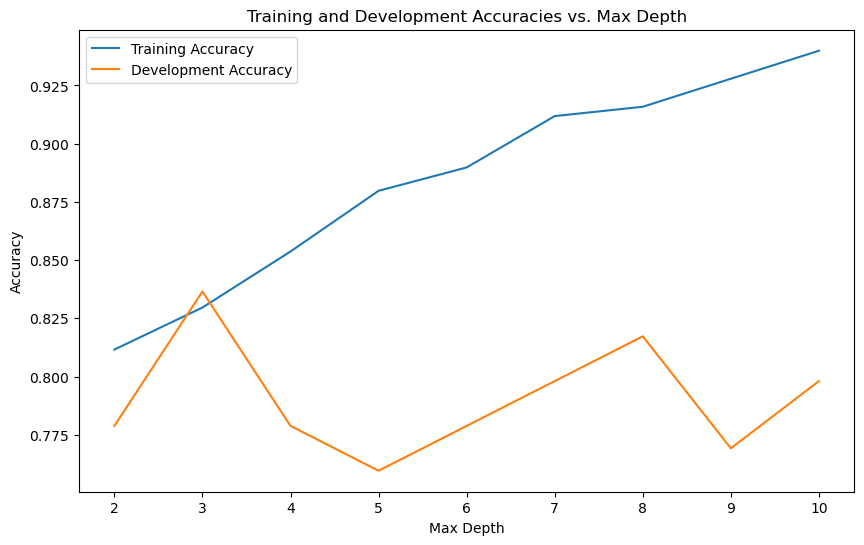

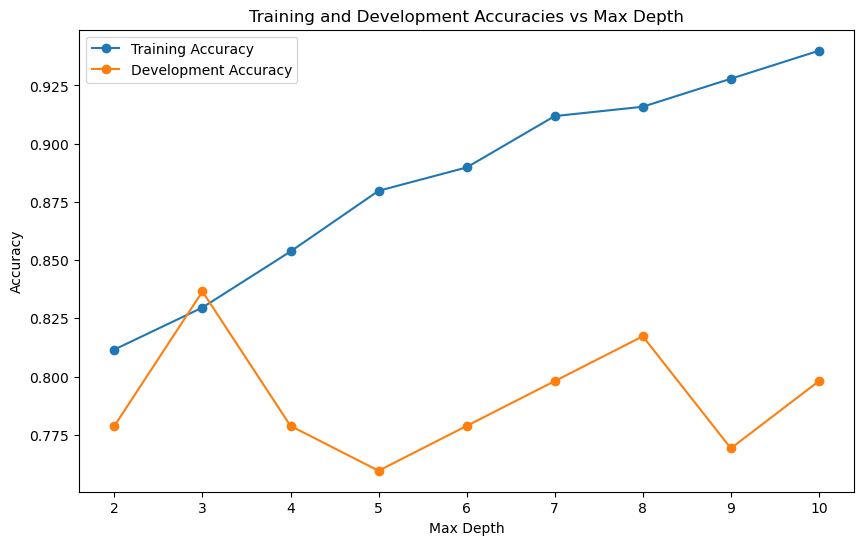

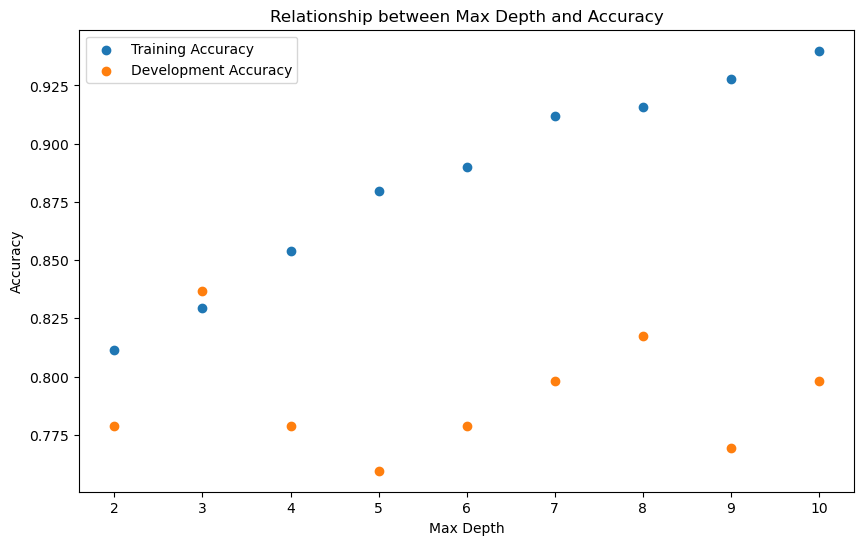

In [133]:
# Plot the training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, dev_accuracies, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies vs. Max Depth')
plt.legend()
plt.show()

# Plot the training and development accuracies on the same graph
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, dev_accuracies, label='Development Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies vs Max Depth')
plt.legend()
plt.show()

# Visualize the relationship between max depth and accuracy
plt.figure(figsize=(10, 6))
plt.scatter(max_depth_values, train_accuracies, label='Training Accuracy')
plt.scatter(max_depth_values, dev_accuracies, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Relationship between Max Depth and Accuracy')
plt.legend()
plt.show()

The plot is useful for identifying the optimal max depth that balances bias and variance, leading to good generalization to unseen data.

The lines in a plot of training and development accuracies versus max depth typically exhibit certain patterns:

Training Accuracy Line: Initially, as max depth increases, training accuracy tends to improve.


Development Accuracy Line: Initially, as max depth increases, development accuracy tends to improve.
After reaching an optimal point, further increasing max depth may lead to overfitting, causing the development accuracy to plateau or even decrease.

Given that your best max depth is 3 and the accuracy on the development set is 0.8365, it seems that the model generalizes well with moderate complexity. This result suggests that a max depth of 3 is a good choice, as it provides a good balance between capturing patterns in the data and avoiding overfitting. To further validate this, it's essential to evaluate the model on an independent test set.



In [134]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

# Create the decision tree classifier with the best_max_depth
final_dt_classifier = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(final_dt_classifier, X_train, y_train, cv=5)

# Make predictions using cross-validated model
y_train_pred_cv = cross_val_predict(final_dt_classifier, X_train, y_train, cv=5)

# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_train_pred_cv)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_train, y_train_pred_cv)
print("\nClassification Report:")
print(class_report)

# Mean cross-validated score
print("\nMean Cross-Validated Accuracy:", cv_scores.mean())


Confusion Matrix:
[[270  30]
 [ 72 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       300
           1       0.81      0.64      0.71       199

    accuracy                           0.80       499
   macro avg       0.80      0.77      0.78       499
weighted avg       0.80      0.80      0.79       499


Mean Cross-Validated Accuracy: 0.7955959595959595


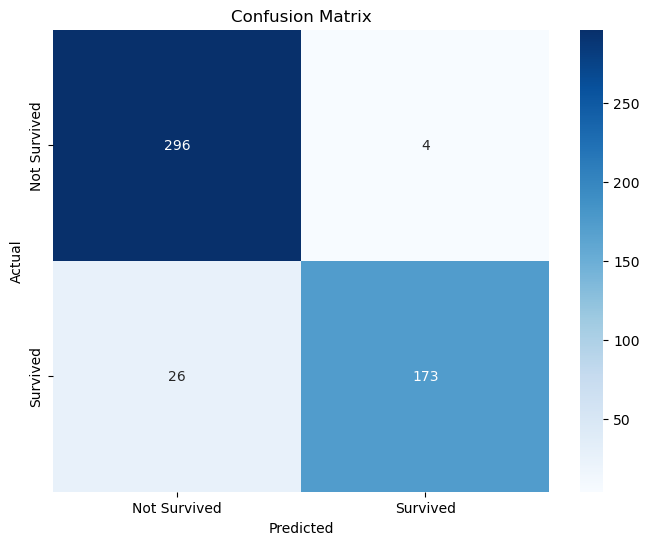

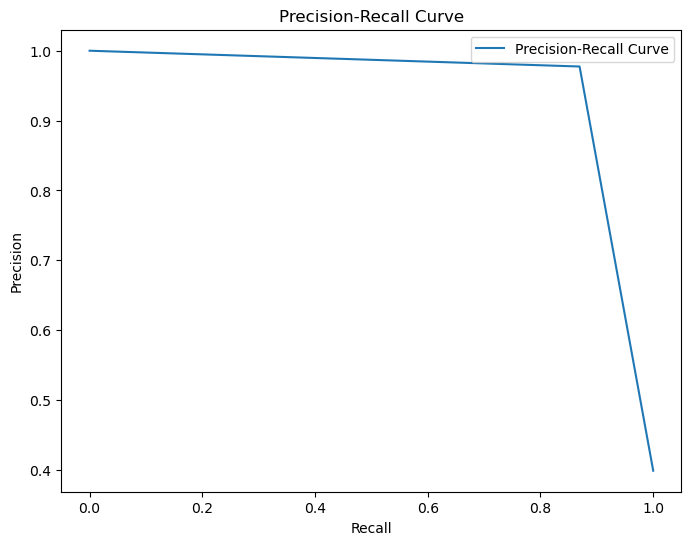

In [135]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

True Positive (TP): 127 - The model correctly predicted 127 instances of passengers who survived.
True Negative (TN): 270 - The model correctly predicted 270 instances of passengers who did not survive.
False Positive (FP): 30 - The model incorrectly predicted 30 instances as survived when they did not.
False Negative (FN): 72 - The model incorrectly predicted 72 instances as not survived when they did.

Precision for class 0 (Not Survived) is 0.79, and for class 1 (Survived) is 0.81.
Recall for class 0 is 0.90, and for class 1 is 0.64.
F1-Score for class 0 is 0.84, and for class 1 is 0.1.

Mean Cross-Validated Accuracy: 0.7955959595959595

The model has a reasonable accuracy of 80%, indicating that it correctly predicts the survival status for 80% of the passengers in the dataset.
Precision and Recall values provide insights into the model's performance for each class.
The confusion matrix gives a detailed breakdown of correct and incorrect predictions.
Cross-validated accuracy helps assess the model's generalization performance.
In summary, the model shows promising results, but further analysis and potential improvements could be explored based on the specific requirements and objectives of the project.

In [88]:
# Find the index of the maximum development accuracy
best_dev_accuracy_index = np.argmax(dev_accuracies)

# Get the corresponding best max depth
best_max_depth = max_depth_values[best_dev_accuracy_index]

# Use the best_max_depth to train the final decision tree
final_dt_classifier = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_dt_classifier.fit(X_train, y_train)

# Make predictions on the development set
y_dev_pred = final_dt_classifier.predict(X_dev)

# Calculate accuracy on the development set
dev_accuracy = accuracy_score(y_dev, y_dev_pred)

print(f"Best Max Depth: {best_max_depth}")
print(f"Accuracy on the development set: {dev_accuracy:.4f}")

Best Max Depth: 3
Accuracy on the development set: 0.8365
